## Antes de entrenar un modelo, aprendamos sobre el funcionamiento y la API de scikit-learn

In [1]:
import numpy as np 
import pandas as pd

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
  
  <ul>
    <li> Preprocesamiento de datos en <code> sklearn.preprocessing </code> </li>
    <li> Algoritmos de Machine Learning en <code>sklearn.linear_model</code>, <code>sklearn.svm</code>, <code>sklearn.ensemble</code>, y muchos más.</li>
    <li> Evaluación de modelos en <code>sklearn.model_selection</code> y <code>sklearn.metrics</code> </li>
  </ul>
</div>

<div class="alert alert-success">
  Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Una estructura de datos esencial en scikit-learn es el <strong>Estimator</strong>
</div>

<img src="img/estimator.png" width="600" style="margin:0 auto;clear:both">

<img src="img/evaluation_flow.png">

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Para poder escoger el estimator apropiado una excelente guia es el <strong>cheatsheet</strong> siguiente, hecho por uno de los core-dev de scikit-learn.
</div>

<img src="img/ml_map.png" width="1000" style="margin:0 auto;clear:both">

## Implementemos un modelo simple de regresión primero

In [2]:
X = pd.read_csv('X.csv')
X

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...,...
4099,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


In [3]:
# separamos la variable objetiva
y = X['worldwide_gross']

In [4]:
# quitamos Y de los datos "axis=1" por que es una columna
X = X.drop('worldwide_gross',axis=1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [7]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [9]:
X.head(5)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [10]:
# REGRESION LASSO
from sklearn.linear_model import Lasso
# Lo instanciamos
model = Lasso()

In [11]:
# ENTRENAR EL MODELO
model.fit(X_train,y_train)

Lasso()

In [12]:
# VECTOR DE PREDICCION CON LOS DATOS DE TEST
predicted = model.predict(X_test)

In [13]:
predicted.shape

(1642,)

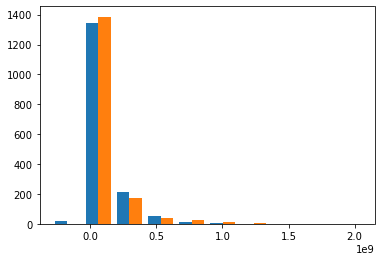

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test]);

## Evaluemos de forma más fina el comportamiento de nuestro modelo

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función <code>estimator.score</code> ya viene con una de las métricas de <code>sklearn.metrics</code>, que es la métrica <code>sklearn.metric.r2_score</code>
</div>


<div class="alert alert-success">
  El <strong>score R2</strong> de una regresión es una de las formas más comunes de entender su poder predictivo. Este <strong>mientras más cerca de 1 este, mejor es</strong>
</div>
<div class="alert alert-success">
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media. 
</div>

In [18]:
model.score(X_test,y_test)

0.5803597861019067

In [ ]:
Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

<img src="img/datasaurus_dozen.png" width="800" style="margin:0 auto;clear:both">
<div class="alert alert-success">
<strong>Siempre visualiza tus resultados</strong>, aunque tengas un buen score de performance.
</div>



In [19]:
residuals = y_test - predicted

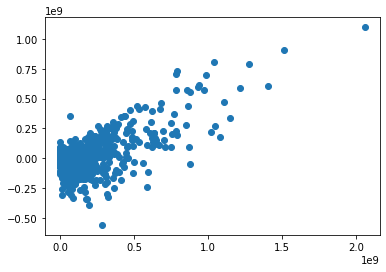

In [20]:
plt.scatter(y_test,residuals)

In [21]:
ap_residuals = np.abs(residuals) / y_test

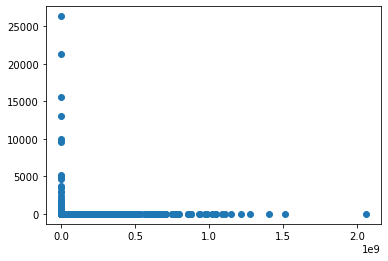

In [22]:
plt.scatter(y_test,ap_residuals)

In [23]:
lap_residuals = np.log(ap_residuals)

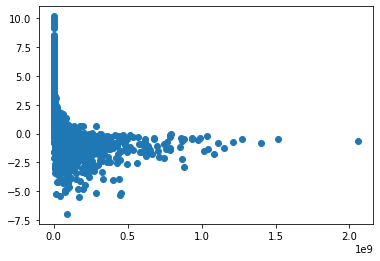

In [24]:
plt.scatter(y_test,lap_residuals)

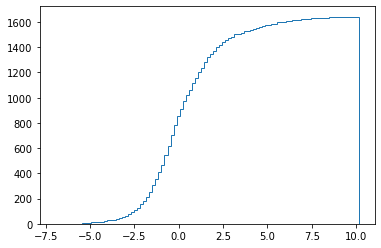

In [38]:
# funcion acumulativo distribucion de los errores
#plt.hist(lap_residuals,bins=100, normed = True, histtype='step', cumulative=True)
plt.hist(lap_residuals,bins=100, histtype='step', cumulative=True);


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

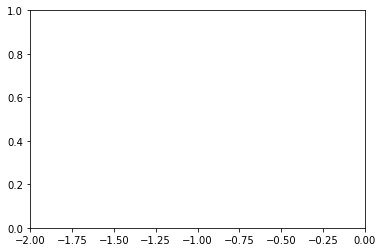

In [40]:
#plt.hist(lap_residuals, bins=100, normed=1, histtype='step',cumulative=True);
plt.hist(lap_residuals, bins=100, histtype='step',cumulative=True);

plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

In [41]:
plt.scatter(np.arange(8),model.coef_)

ValueError: x and y must be the same size

In [42]:
X = pd.read_csv('X.csv')

In [43]:
X = X.drop('gross',axis=1)

KeyError: "['gross'] not found in axis"

In [44]:
X = X.drop('worldwide_gross',axis=1)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [46]:
model = Lasso()
model.fit(X_train,y_train)

/home/infinity/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.719398860662831e+18, tolerance: 7186308137135044.0
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [47]:
model.score(X_test,y_test)

0.5775927291761465

In [48]:
X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score'],
      dtype='object')

In [49]:
for el in zip(list(X.columns),list(model.coef_)):
    print(el)

('production_budget', 3.032480255563571)
('title_year', -41776.80398675092)
('aspect_ratio', -5828012.0361397425)
('duration.1', -130008.6149265567)
('cast_total_facebook_likes', 225.35605544791466)
('budget', -0.022873578439584208)
('imdb_score', 29221313.113795076)
